# 1 显示界面
> 本界面同时作为结果显示界面和主函数。


## 1.1 test

In [4]:
from src import CcGenerator
cc_info = CcGenerator()
cc_info.save_ab_cc()

process: k = 1
process: k = 2
process: k = 3
process: k = 4
process: k = 5
process: k = 6
process: k = 7
process: k = 8


In [5]:
from src import ErrTester
err_info = ErrTester()
err_info.save_err()

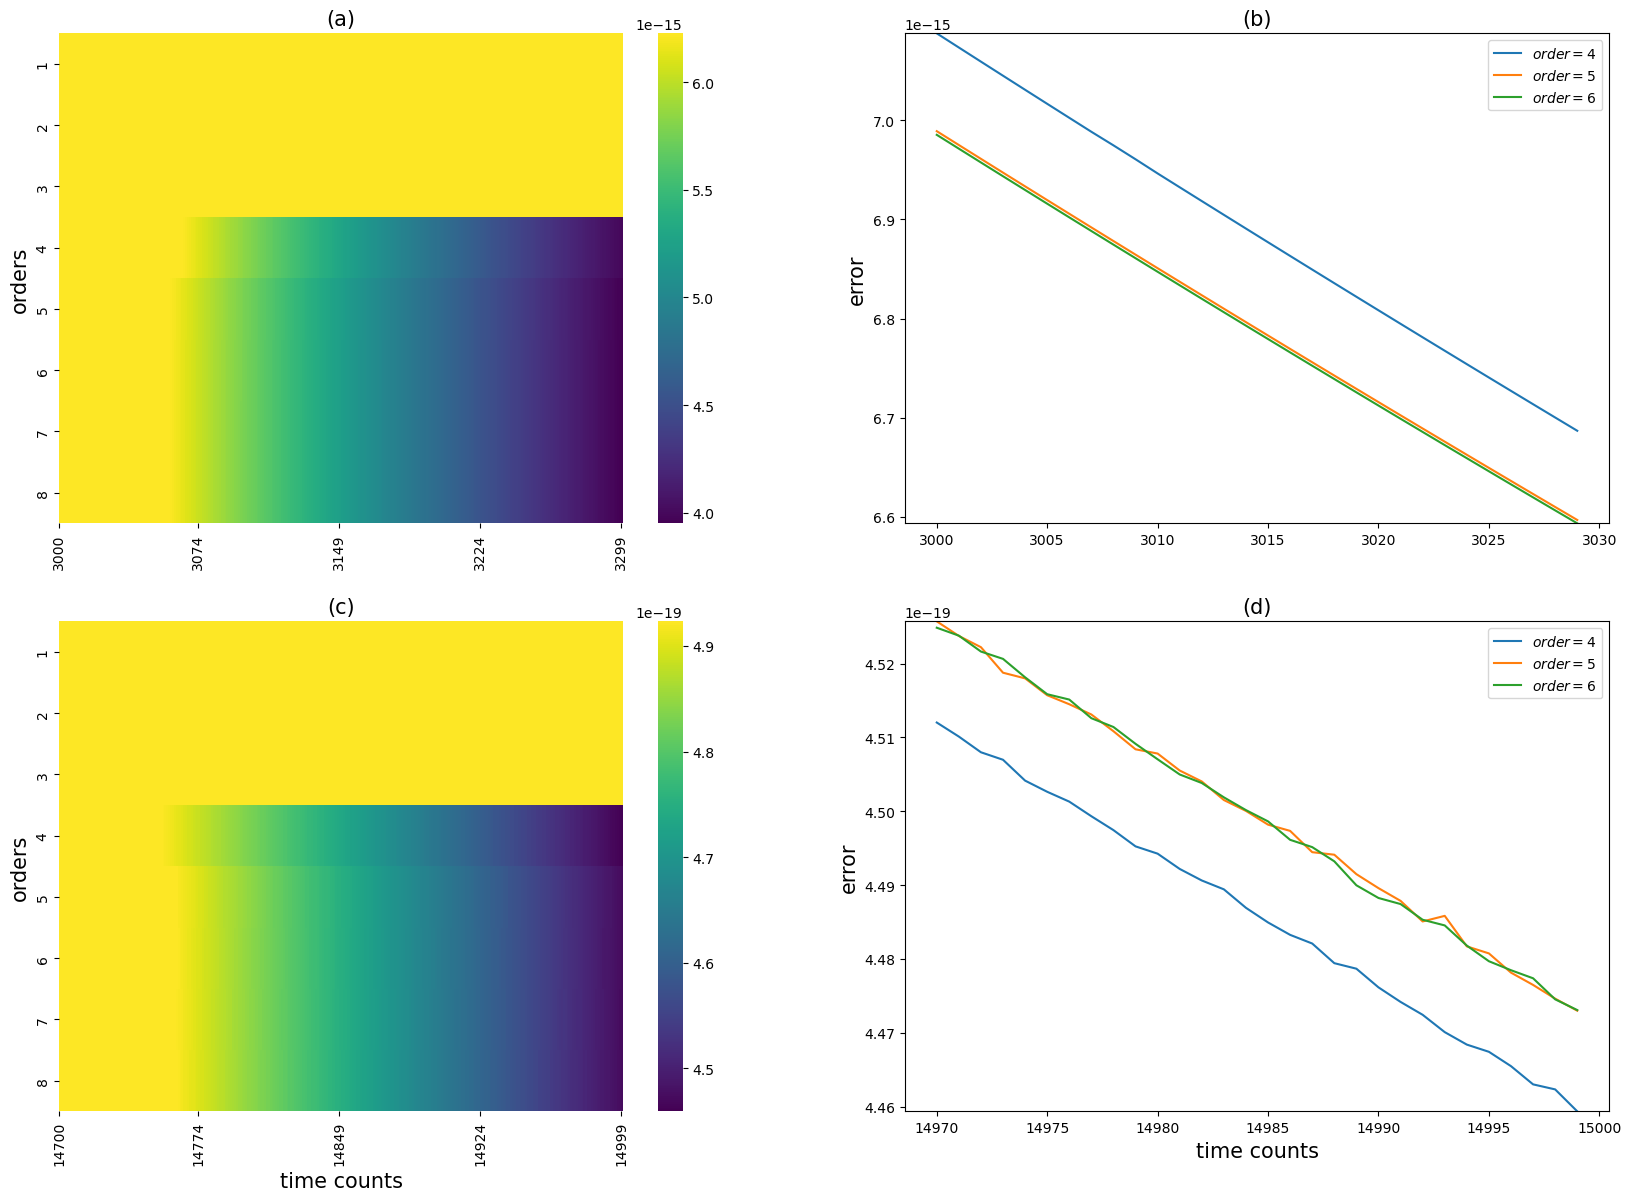

In [6]:
from src import ErrVisualizer
err_graph = ErrVisualizer()
err_graph.plot_err()

可以发现

* 4阶之后的算法明显优于四阶之前，

* 5阶之后的算法在步数为2000步之后差别不大，

* 逐步提高步数，4阶之后的算法差距逐渐减小，且优化轨迹不在稳定，已经达到步数瓶颈。


传统估计误差为下：

* 全局舍入误差：$O(h^4)$
* 全局截断误差：$O(\frac{\epsilon}{h})$

依然由舍入误差主导，理论上可以继续增加步数至350000步都由舍入误差主导。

但是可以发现步数对误差的减小斜率已经非常小，且实际积分复杂于测试震荡函数，所以对时间暂取4阶15000步步长即可。

能谱的曲线比较平滑，所以对$\theta$积分可以取高阶函数以减小步数. 如6阶500步

动量只有视图意义，取200即可。

In [7]:
from src import ErrTester
import numpy as np
err_info = ErrTester()
t_max = err_info.t_vec[-1]
print(t_max/ np.array([3000, 3300]))
print(t_max/ np.array([14970, 15000]))

[0.14697509 0.13361372]
[0.02945393 0.02939502]


In [8]:
step_count_vec = np.arange(0, 500000)
step_vec = t_max / step_count_vec
global_round_err_vec = step_vec ** 6
epsilon = 10 ** -16
global_truncation_arr = epsilon / step_vec
for i in range(0, 500000):
    if global_round_err_vec[i] < global_truncation_arr[i]:
        if i > 10000:
            print("临界步数为{},对应步长{}".format(i, step_vec[i]))
            break

临界步数为85130,对应步长0.005179434802236073


/tmp/ipykernel_20640/2021451657.py:2: RuntimeWarning: divide by zero encountered in divide
  step_vec = t_max / step_count_vec


## 1.2 calculator

### 1.2.1 SC

#### 1.2.1.1 laser

$$
\vec E(t) = E_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(\omega t) \hat e_x
$$

where:
* $T = 2\pi / \omega$
* $\tau = NT$
* $\sigma = \frac{\tau}{4\sqrt{2\ln 2}}$
* $t_0 = NT/2$ 为激光脉冲的中心时刻，使得激光脉冲在时间轴上对称分布

In [10]:
from src import ScLaserGenerator
field_data = ScLaserGenerator()
field_data.save_laser_info()


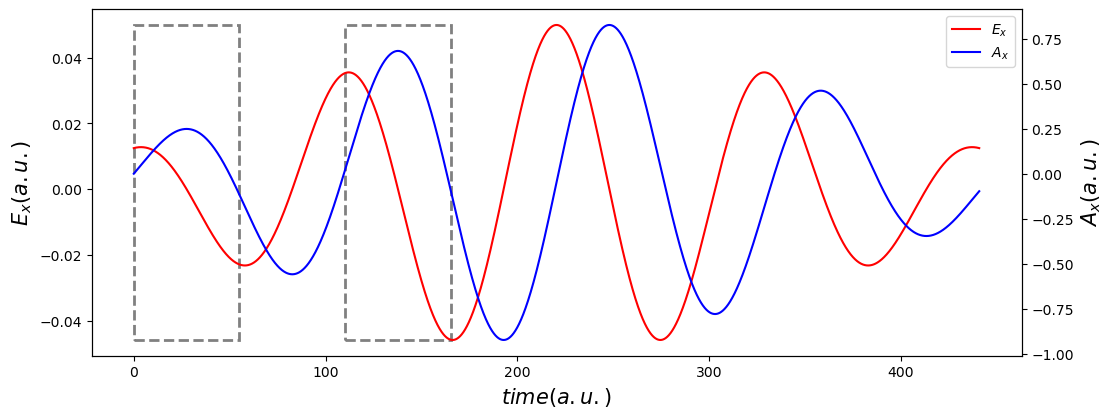

In [11]:
from src import ScLaserVisualizer
field_graph = ScLaserVisualizer()
field_graph.plot_laser()

#### 1.2.1.2 calculation


`这两个代码块是julia代码，注意.jl文件环境修改`

##### 1.2.1.2.1 SPA

In [12]:
include("src/calculator/sc/spa/trans_amp_calculator.jl")
TransAmpCalculator.save_visual_transamp()

NameError: name 'include' is not defined

In [ ]:
include("src/calculator/sc/spa/trans_pro_calculator.jl")
TransProCalculator.save_visual_trans_pro()

In [ ]:
include("src/visualizer/sc/spa/trans_pro_spect_visualizer.jl")
TransProSpectVisualizer.plot_trans_pro_spect()

##### 1.2.1.2. SFA

In [13]:
from src import ScSfaTransAmpCalculator
trans_amp_data = ScSfaTransAmpCalculator()
trans_amp_data.save_visual_trans_amp()

Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.21333333333333335
Current task progress 0.21333333333333335
Current task progress 0.2133

In [14]:
from src import ScSfaTransProCalculator
trans_pro_data = ScSfaTransProCalculator()
trans_pro_data.save_visual_trans_pro()

In [15]:
from src import ScSfaSpectrumCalculator
trans_spec_data = ScSfaSpectrumCalculator()
trans_spec_data.save_visual_spect()

##### 1.2.1.2.3 CVA

In [16]:
from src import ScCvaTransAmpCalculator
trans_amp_data = ScCvaTransAmpCalculator()
trans_amp_data.save_visual_trans_amp()

Current task progressCurrent task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.21333333333333335
Current task progress 0.21333333333333335
Current task progress 0.2133

In [17]:
from src import ScCvaTransProCalculator
trans_pro_data = ScCvaTransProCalculator()
trans_pro_data.save_visual_trans_pro()

In [18]:
from src import ScCvaSpectrumCalculator
trans_spec_data = ScCvaSpectrumCalculator()
trans_spec_data.save_visual_spect()

1.2.1.3 plot

##### 1.2.1.3.2 SFA

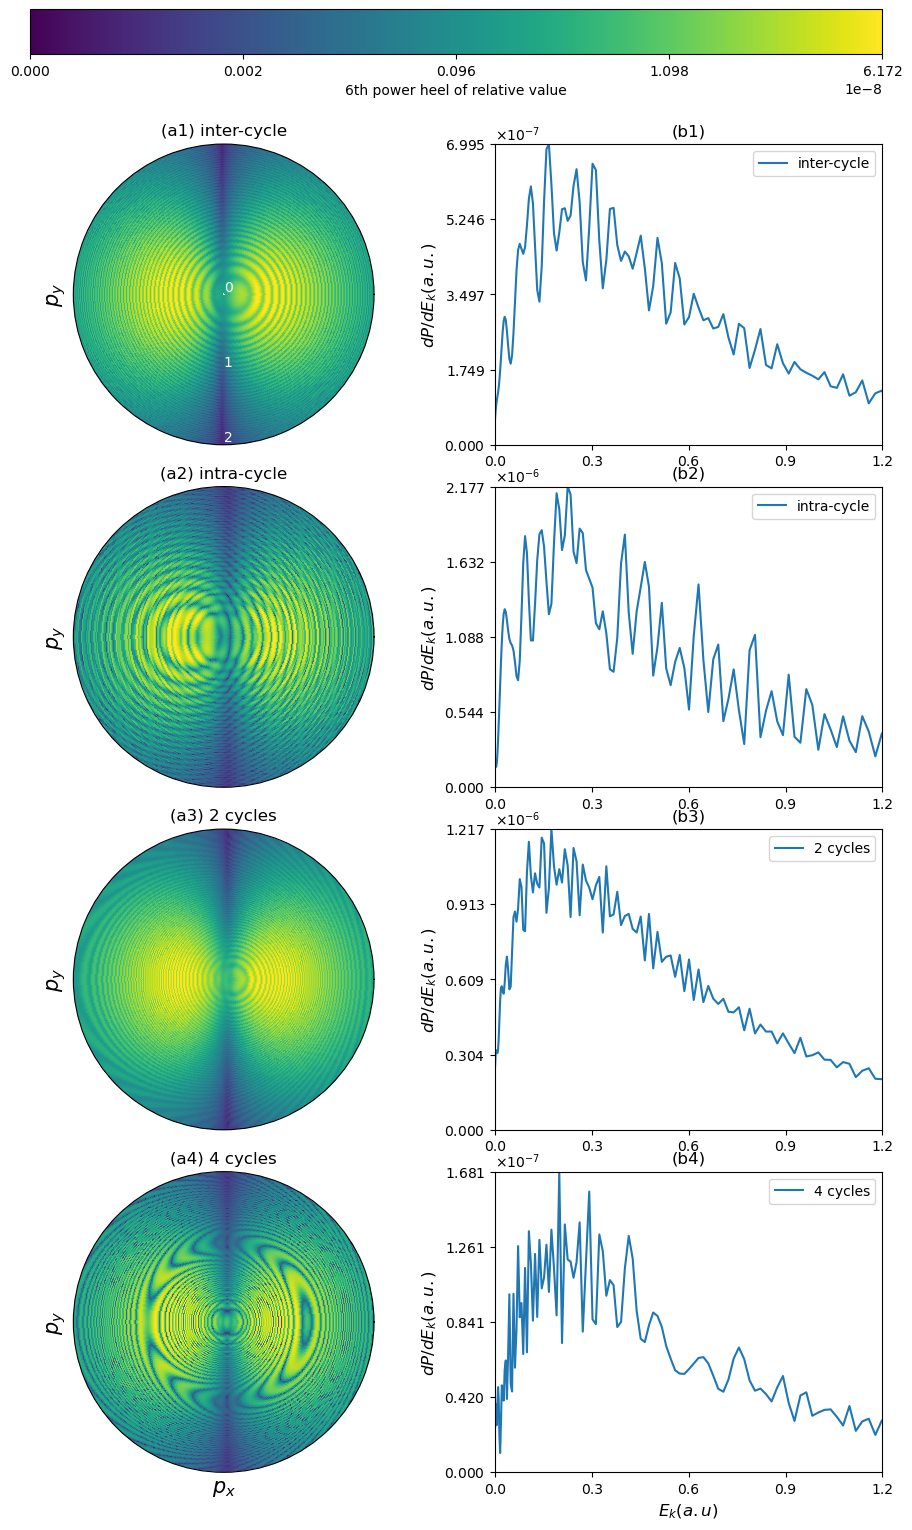

In [1]:
from src import ScSfaTransProSpectVisualizer
trans_pro_graph = ScSfaTransProSpectVisualizer()
trans_pro_graph.plot_trans_pro_spect()

##### 1.2.1.2.3 CVA

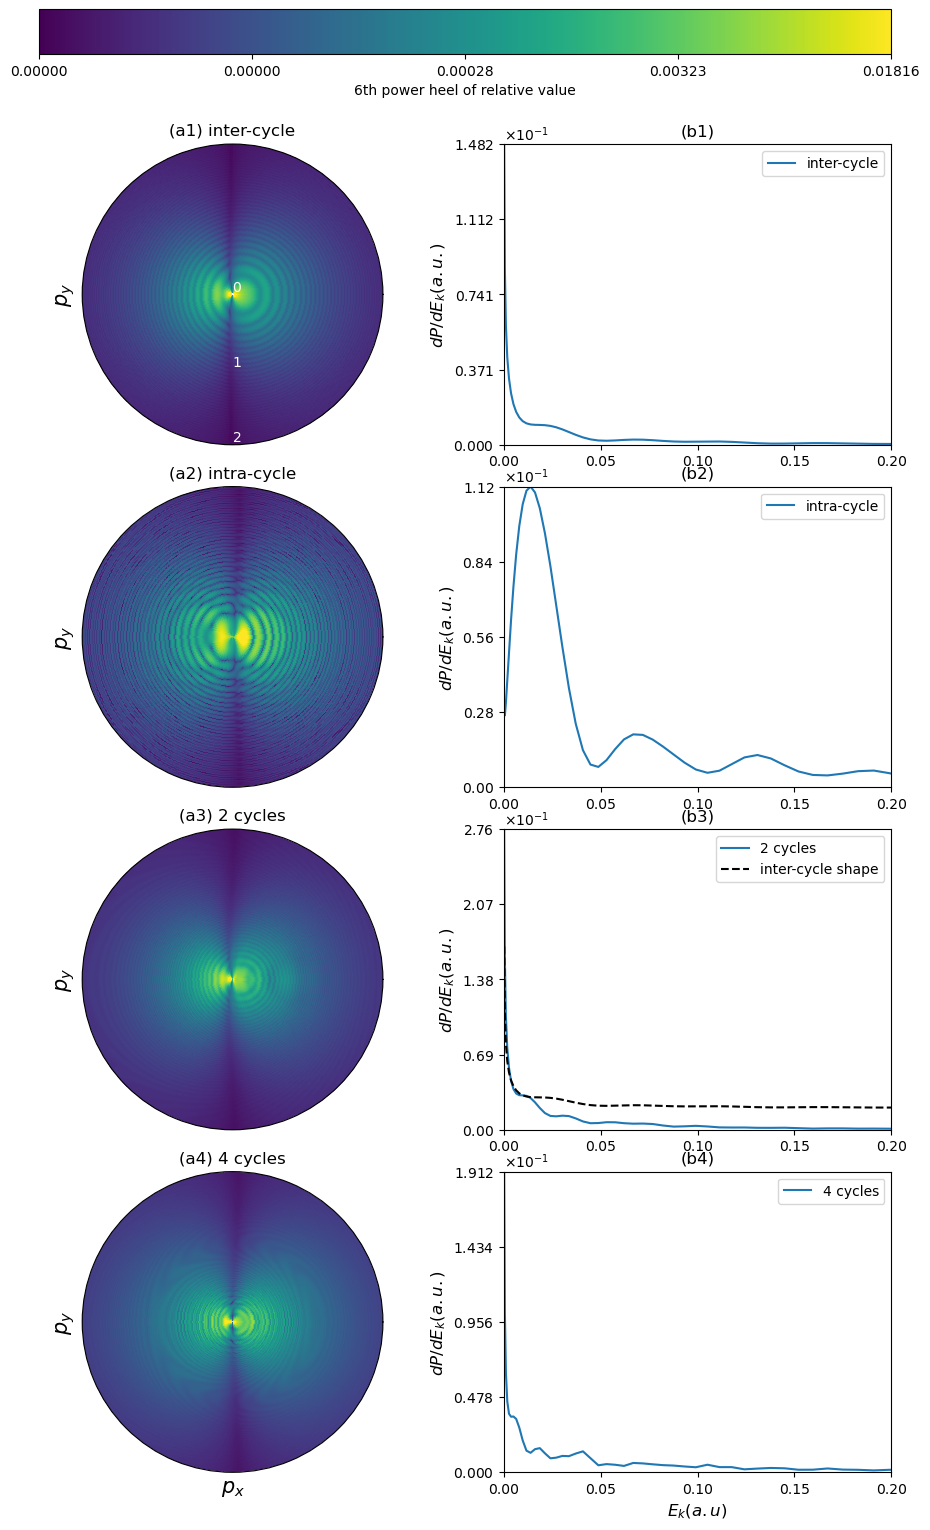

In [1]:
from src import ScCvaTransProSpectVisualizer
trans_pro_graph = ScCvaTransProSpectVisualizer()
trans_pro_graph.plot_trans_pro_spect()

### 1.2.2 OTC

#### 1.2.2.1 laser

$$
\vec E(t) = E_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(\omega t) \hat e_x + E_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(2 \omega t + \phi) \hat e_y
$$

In [21]:
from src import OtcLaserGenerator
field_data = OtcLaserGenerator()
field_data.save_laser_info()

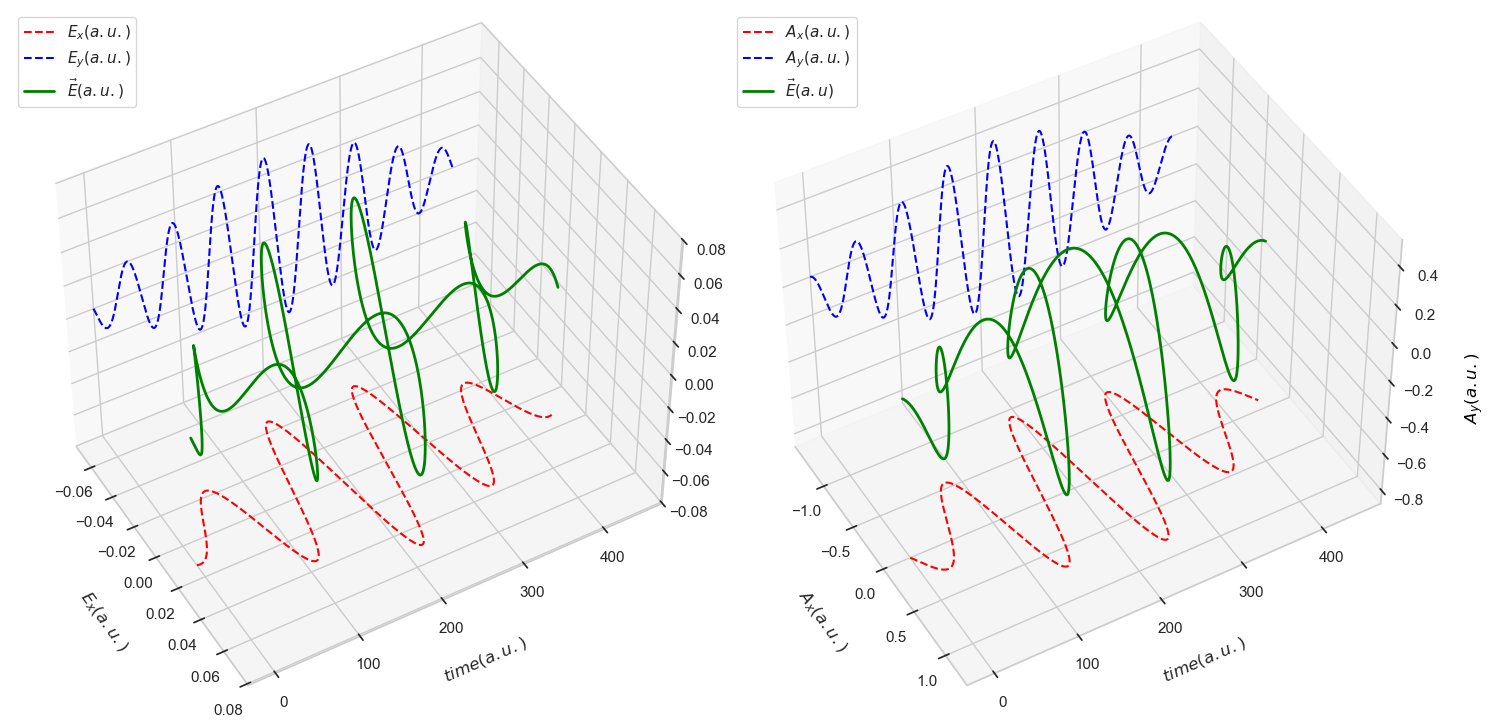

In [22]:
from src import OtcLaserVisualizer
field_graph = OtcLaserVisualizer()
field_graph.plot_laser()

#### 1.2.2.2 calculation

##### 1.2.2.2.1 SFA

In [23]:
from src import OtcSfaTransAmpCalculator
trans_amp_data = OtcSfaTransAmpCalculator()
trans_amp_data.save_visual_trans_amp()

Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.21333333333333335
Current task progress 0.21333333333333335
Current task progress 0.2133

In [24]:
from src import OtcSfaTransProCalculator
trans_Pro_data = OtcSfaTransProCalculator()
trans_Pro_data.save_visual_trans_pro()

In [25]:
from src import OtcSfaSpectrumCalculator
spect_data = OtcSfaSpectrumCalculator()
spect_data.save_visual_spect()

##### 1.2.2.2.2 CVA

In [26]:
from src import OtcCvaTransAmpCalculator
trans_amp_data = OtcCvaTransAmpCalculator()
trans_amp_data.save_visual_trans_amp()

Current task progressCurrent task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
 0.05333333333333334
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.21333333333333335
Current task progress 0.21333333333333335
Current task progress 0.2133

In [27]:
from src import OtcCvaTransProCalculator
trans_pro_data = OtcCvaTransProCalculator()
trans_pro_data.save_visual_trans_pro()

In [28]:
from src import OtcCvaSpectrumCalculator
spect_data = OtcCvaSpectrumCalculator()
spect_data.save_visual_spect()

#### 1.2.2.3 plot

##### 1.2.2.3.1 SFA

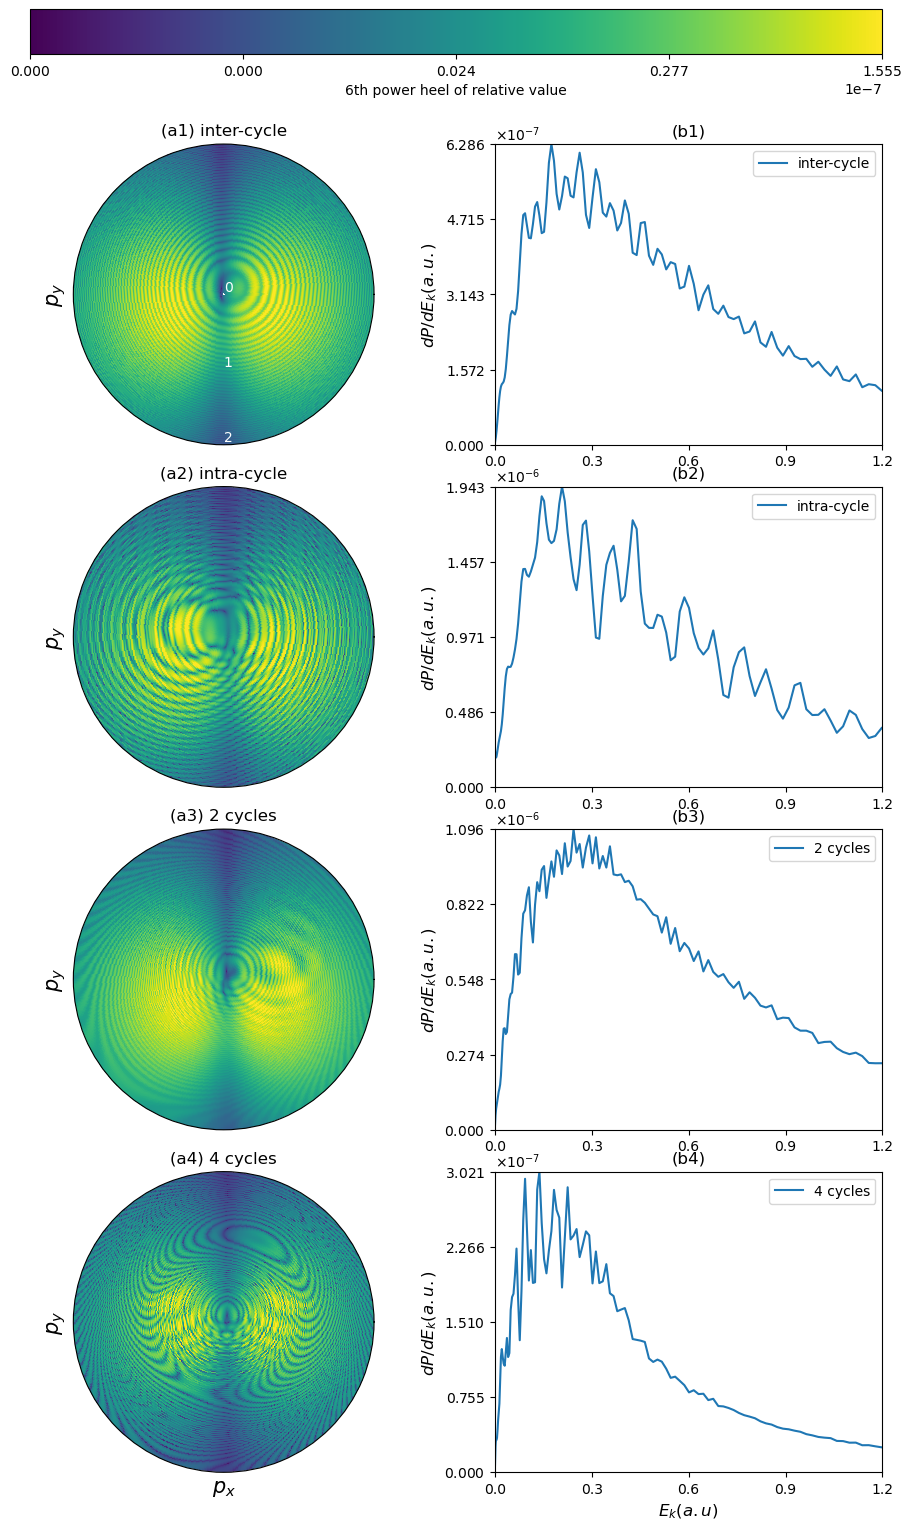

In [1]:
from src import OtcSfaTransProSpectVisualizer
trans_pro_graph = OtcSfaTransProSpectVisualizer()
trans_pro_graph.plot_trans_pro_spect()

##### 1.2.2.3.2 CVA

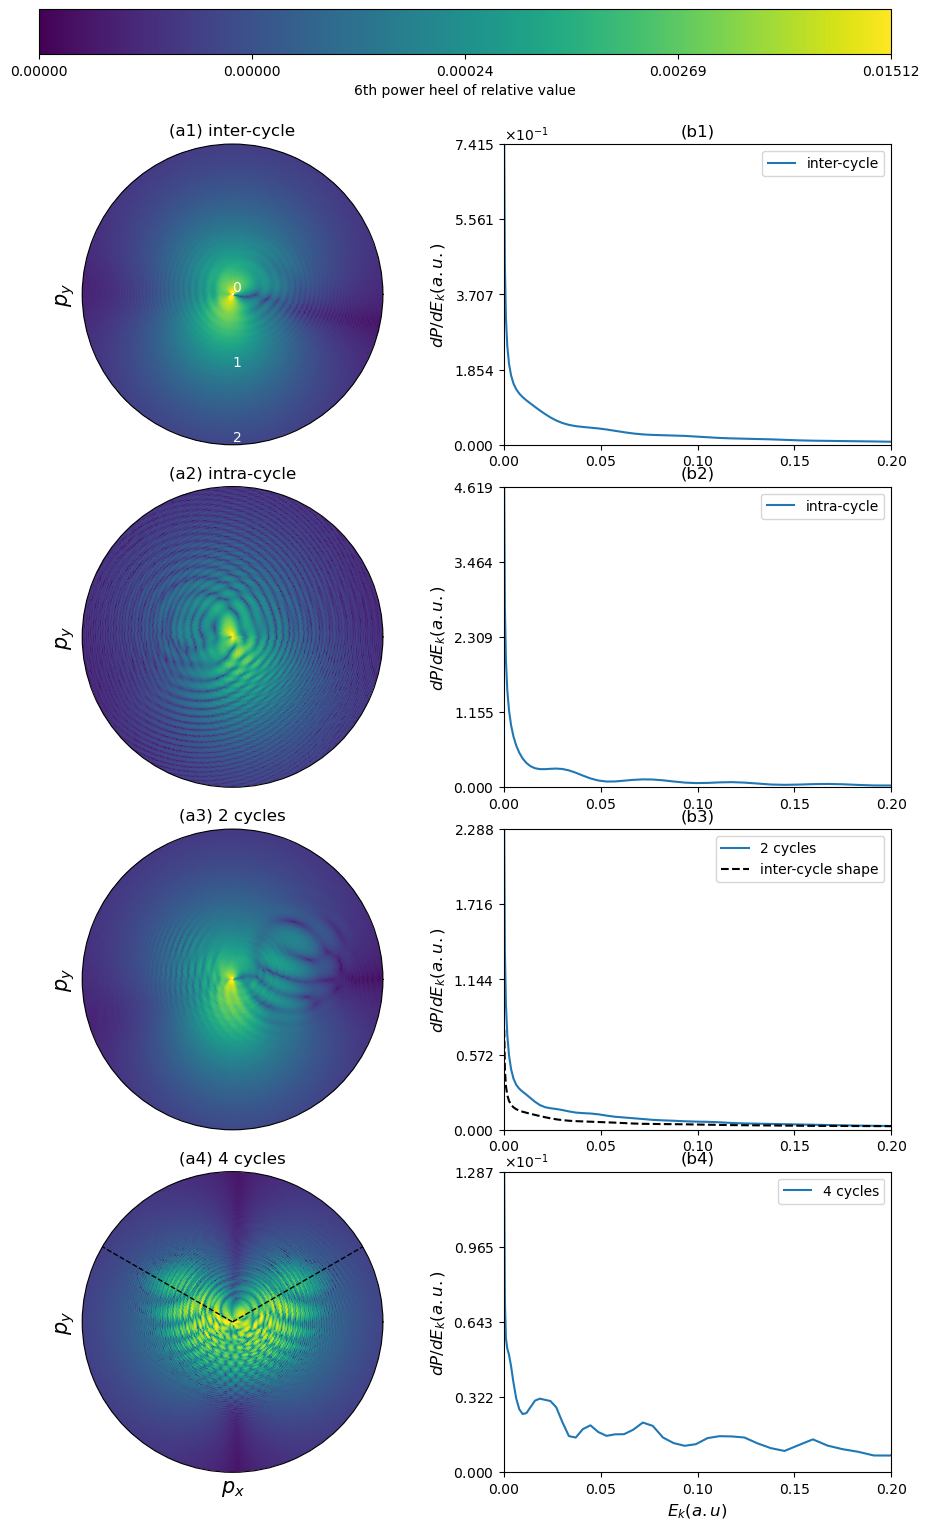

In [1]:
from src import OtcCvaTransProSpectVisualizer
trans_pro_graph = OtcCvaTransProSpectVisualizer()
trans_pro_graph.plot_trans_pro_spect()

### 1.2.3 N_OTC85

#### 1.2.3.1 laser

$$
\vec E(t) = \vec E_1 \cos{\alpha} + \vec E_1 \sin{\alpha} + \vec E_2
$$

where

$$
\begin{cases}
\vec E_1 = E_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(\omega t) \hat e_x\\
\vec E_2 = E_0 \exp\left(-\frac{(t - t_0)^2}{2\sigma^2}\right) \cos(2 \omega t + \phi) \hat e_y\\
\alpha = \frac{5\pi}{180}
\end{cases}
$$

In [31]:
from src import NOtc85LaserGenerator
field_data = NOtc85LaserGenerator()
field_data.save_laser_info()

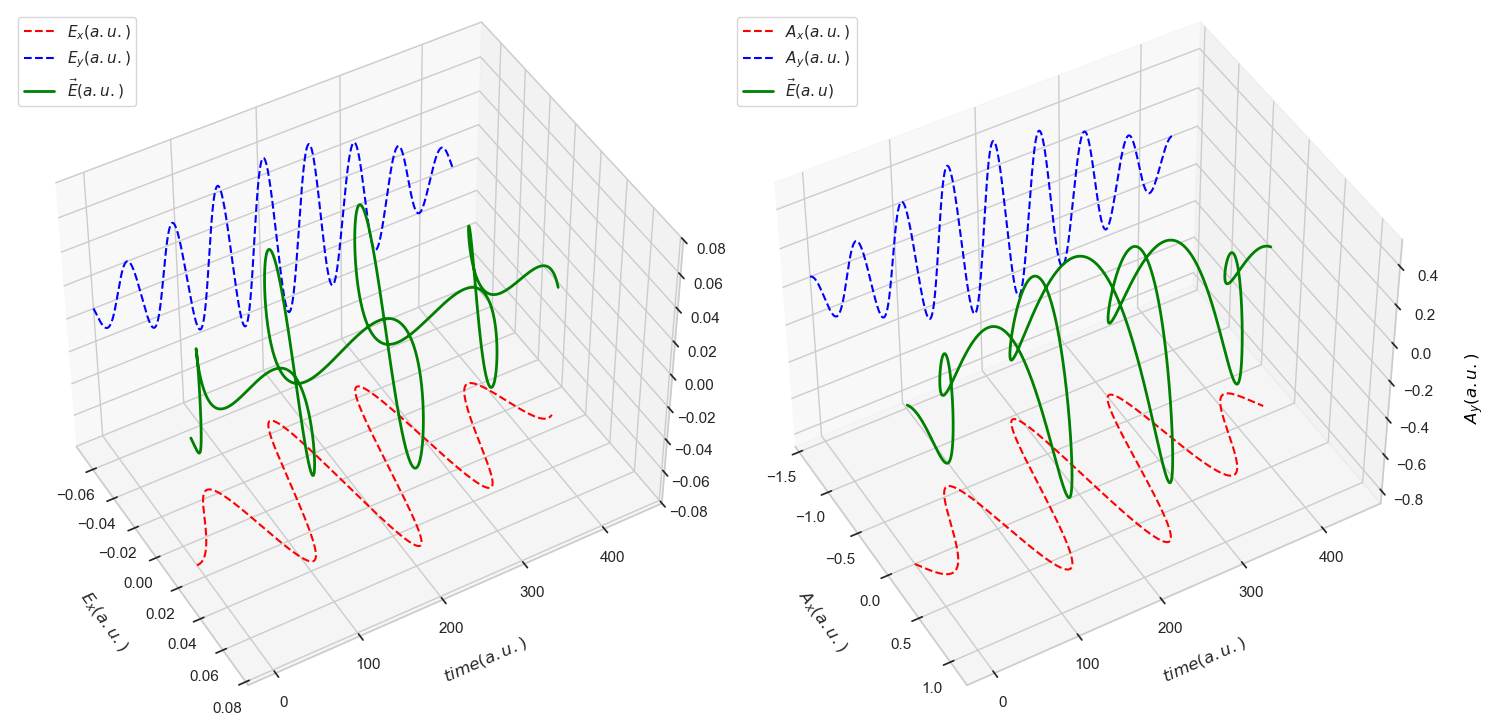

In [32]:
from src import NOtc85LaserVisualizer
field_graph = NOtc85LaserVisualizer()
field_graph.plot_laser()

#### 1.2.3.2 calculation

##### 1.2.3.2.1 CVA

In [33]:
from src import NOtc85CvaTransAmpCalculator
trans_amp_data = NOtc85CvaTransAmpCalculator()
trans_amp_data.save_visual_trans_amp()

Current task progressCurrent task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
 0.05333333333333334
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.21333333333333335
Current task progress 0.21333333333333335
Current task progress 0.2133

In [34]:
from src import NOtc85CvaTransProCalculator
trans_pro_data = NOtc85CvaTransProCalculator()
trans_pro_data.save_visual_trans_pro()

In [35]:
from src import NOtc85CvaSpectrumCalculator
trans_spec_data = NOtc85CvaSpectrumCalculator()
trans_spec_data.save_visual_spect()

#### 1.2.3.3 plot

##### 1.2.3.3.1 CVA

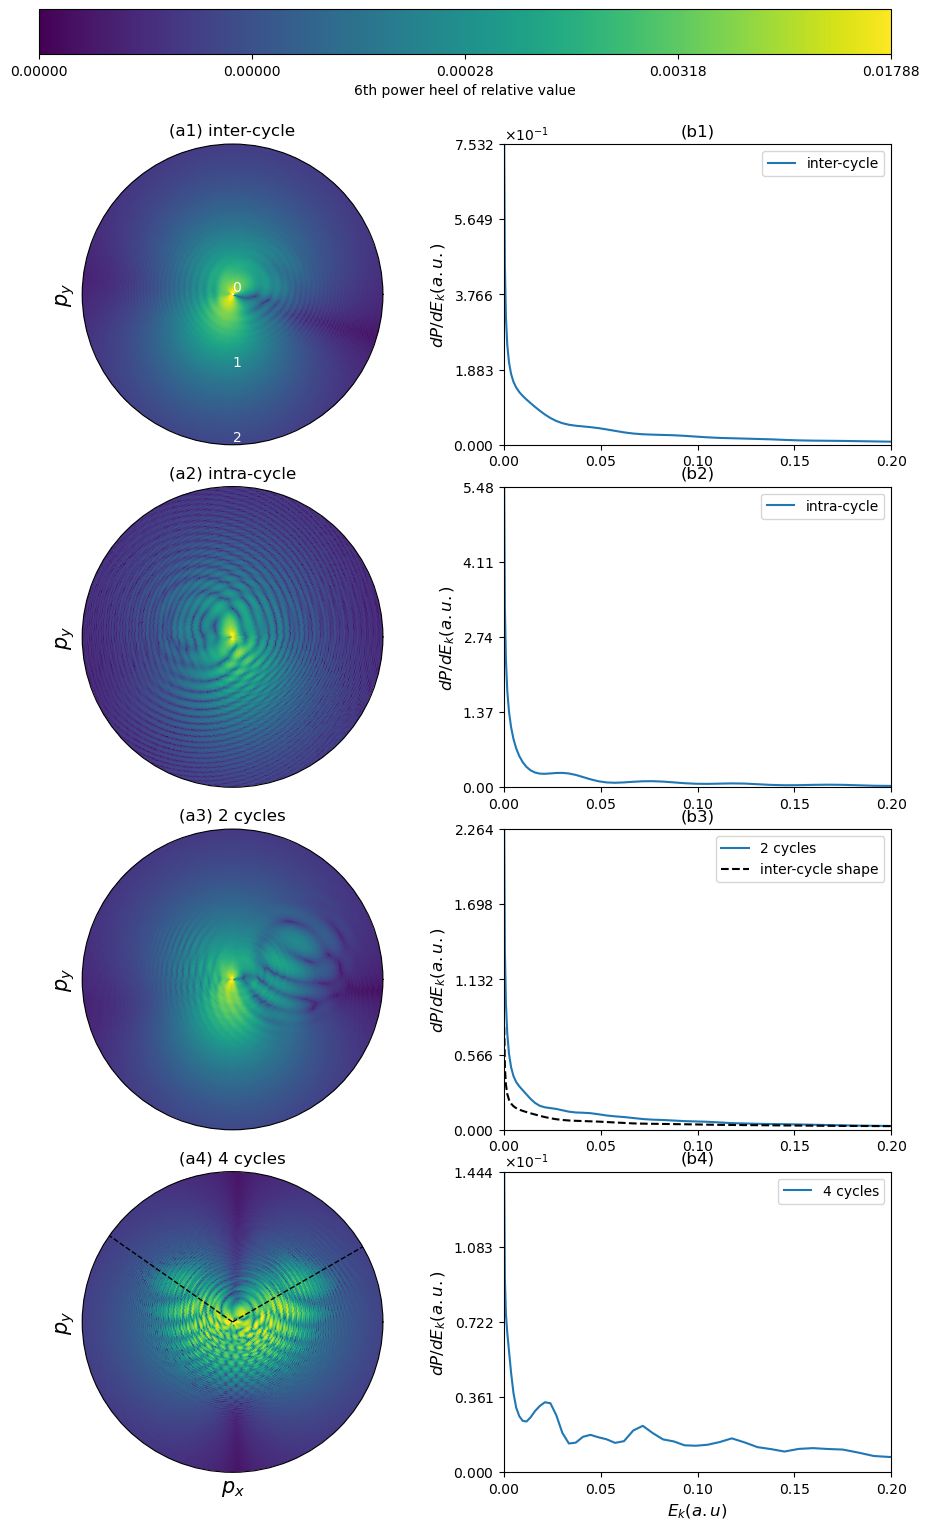

In [1]:
from src import NOtc85CvaTransProSpectVisualizer
trans_pro_graph = NOtc85CvaTransProSpectVisualizer()
trans_pro_graph.plot_trans_pro_spect()

### 1.2.4 N_OTC

#### 1.2.4.1 laser

In [37]:
from src import NOtcLaserGenerator
field_data = NOtcLaserGenerator()
field_data.save_laser_info()

#### 1.2.4.2 calculator

In [38]:
from src import NOtcCvaTransAmpCalculator
trans_amp_data = NOtcCvaTransAmpCalculator()
trans_amp_data.save_visual_trans_amp()

Current task progressCurrent task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
Current task progress 0.05333333333333334
 0.05333333333333334
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.10666666666666667
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.16
Current task progress 0.21333333333333335
Current task progress 0.21333333333333335
Current task progress 0.2133

In [39]:
from src import NOtcCvaTransProCalculator
trans_pro_data = NOtcCvaTransProCalculator()
trans_pro_data.save_visual_trans_pro()

In [40]:
from src import NOtcCvaSpectrumCalculator
spect_data = NOtcCvaSpectrumCalculator()
spect_data.save_visual_spect()

#### 1.2.4.3 plot

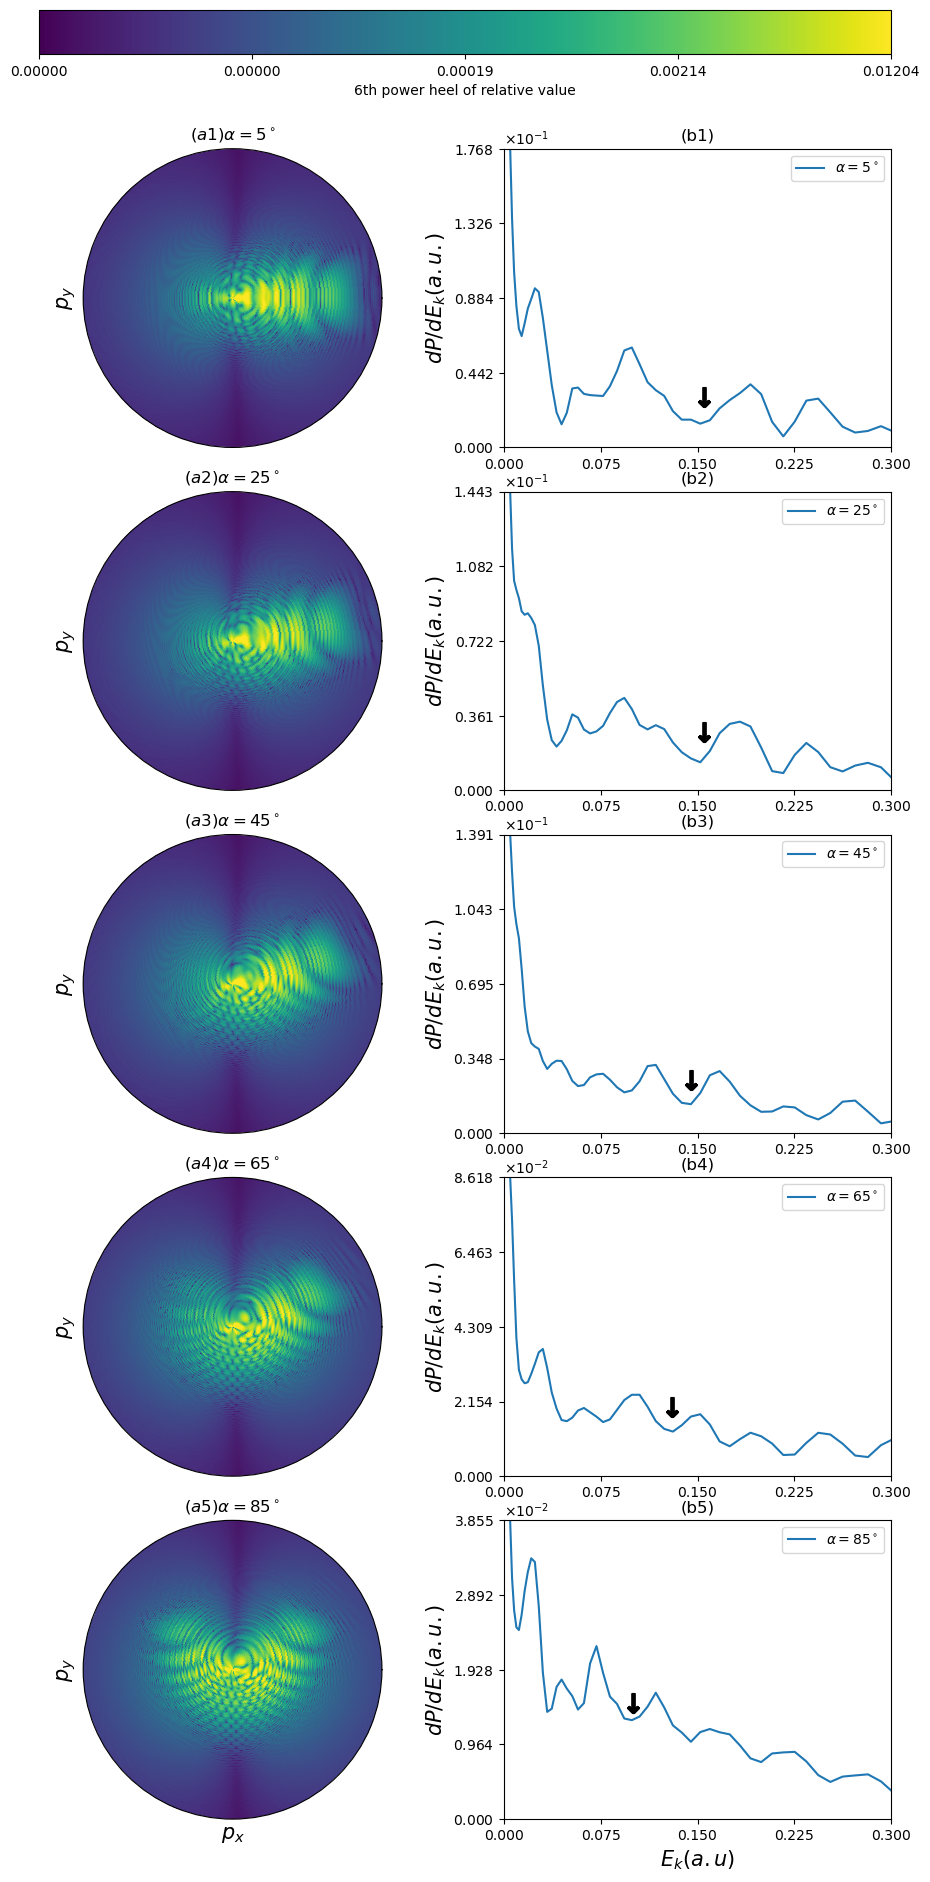

In [1]:
from src import NOtcCvaTransProSpectVisualizer
trans_pro_graph = NOtcCvaTransProSpectVisualizer()
trans_pro_graph.plot_trans_pro_spect()

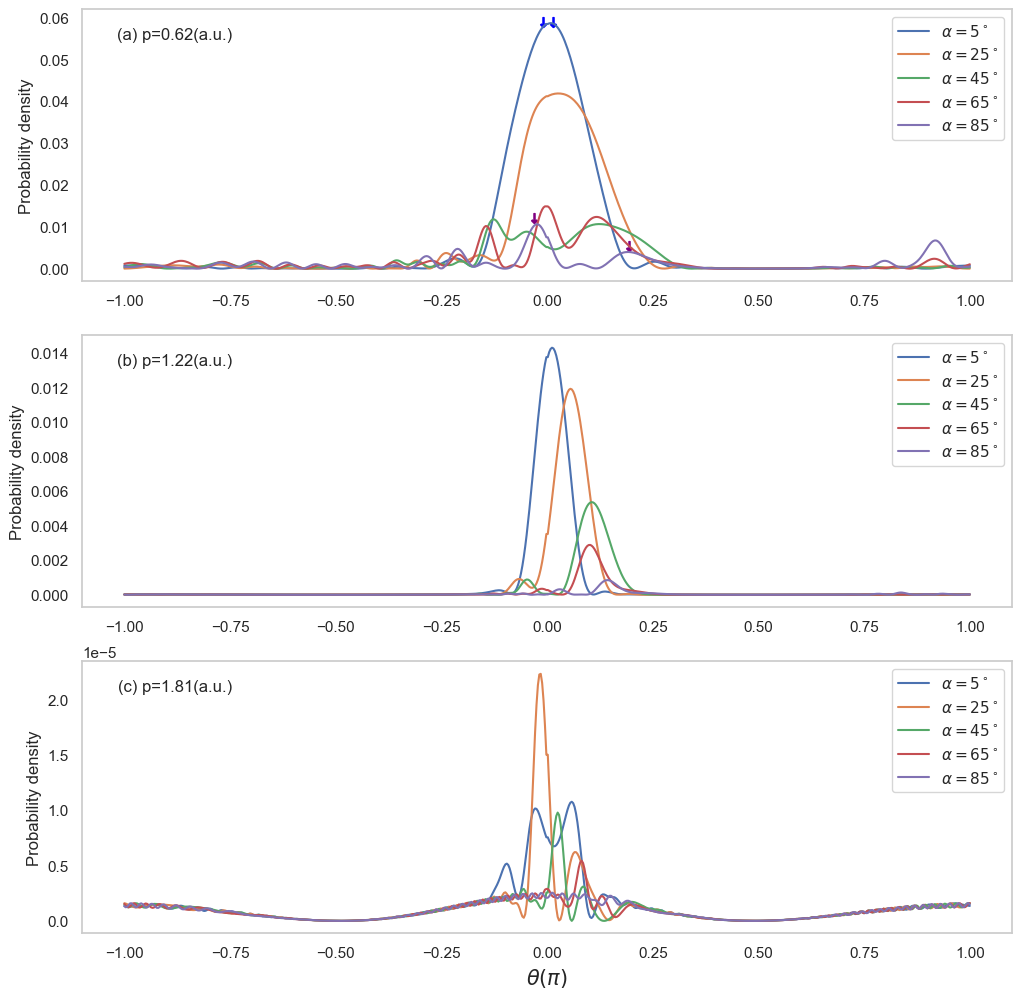

In [42]:
from src import NOtcCvaAmpContrastVisualizer
amp_contrast_graph = NOtcCvaAmpContrastVisualizer()
amp_contrast_graph.plot_amp_contrast()